+ 주성분 분석(PCA) : 흔히 사용하는 데이터 변환 알고리즘
+ 비음수 행렬 분해(NMF) : 특성 추출
+ t-SNE : 산점도로 시각화

## 주성분 분석(PCA)
+ 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술
+ 새로운 특성 중 일부만 선택


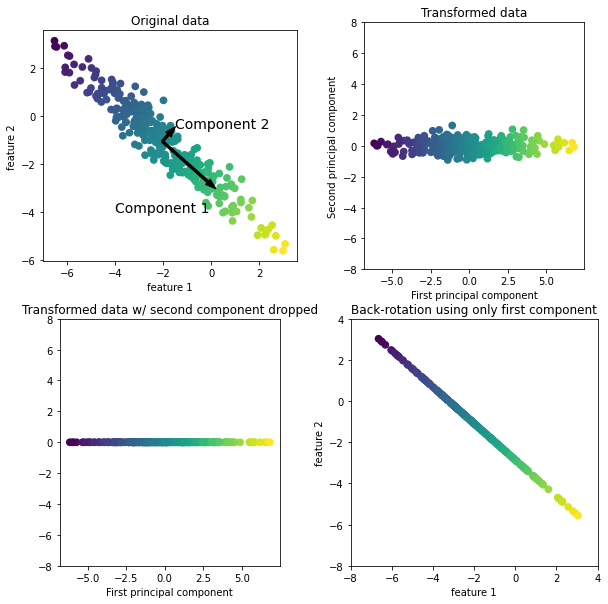

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

+ "성분 1" : 분산이 가장 큰 방향 -> 특성들의 상관관계가 가장 큰 방향(가장 많은 정보를 담고 있는 뱡향)
+ "성분 2" : 첫번째 방향과 직각인 방향 중에서 가장 많은 정보를 담은 방향
+ **찾은 방향들을 주성분이라고 하며, 일반적으로 원본 특성 개수만큼의 주성분이 있다.**
> + 주성분을 기준으로 하여 **정사영**의 형태를 띄게 된다. (분산과 관련)
> + 마지막 그래프처럼 평균을 더하고 회전 시키는 것 -> 첫 번째 주성분의 정보만을 담고 있다. : 데이터에서 노이즈를 제거하거나 주성분에서 유지되는 정보를 시각화


### PCA를 적용해 유방암 데이터셋 시각화하기

+ PCA는 주로 고차원 데이터셋의 시각화에 쓰인다.

**양성과 악성 두 클래스에 대해 각 특성의 히스토그램**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from c

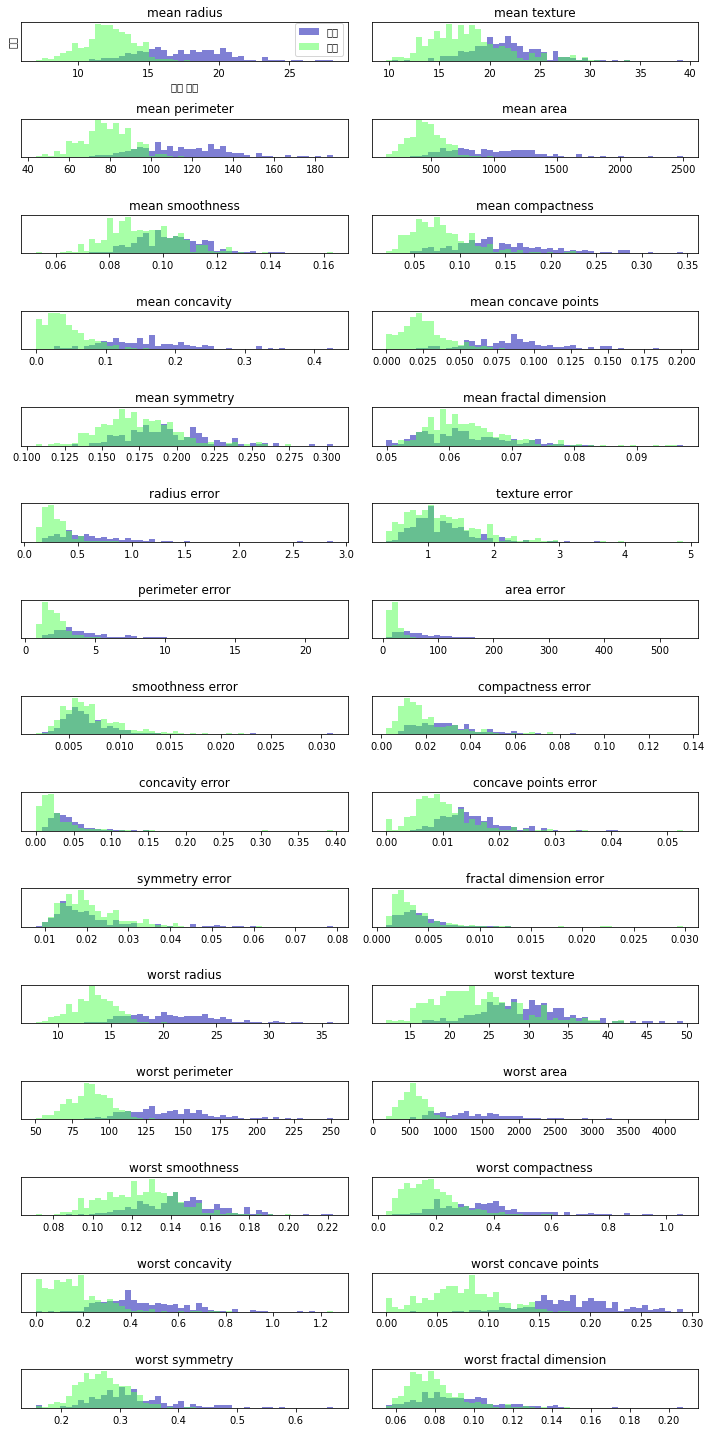

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)

fig, axes = plt.subplots(15, 2, figsize = (10,20))
malignant = cancer.data[cancer.target == 0] #양성
benign = cancer.data[cancer.target == 1] #악성

ax = axes.ravel()

for i in range(30): #특성 30개 다 그림
    _, bins = np.histogram(cancer.data[:,i], bins = 50)
    ax[i].hist(malignant[:, i], bins = bins, color = mglearn.cm3(0), alpha = .5)
    ax[i].hist(benign[:, i], bins = bins, color = mglearn.cm3(2), alpha = .5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("특성 크기")
ax[0].set_ylabel("빈도")
ax[0].legend(["악성", "양성"], loc = "best" )
fig.tight_layout()



> 특정 간격에 얼마나 많은 데이터 포인트가 나타나는지 횟수를 센것
+ 특성들 중 클래스별로 어떻게 분포되어 있는지 알수 있음
+ 특성간의 상호작용과 상호작용이 클래스와 어떤 관련이 있는지 모름
> -> pca를 사용하여 주성분으로 나타냄


In [7]:
#standardScaler로 분산이 1이 되도록 스케일
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) #주성분 2개 이용
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태: ", str(X_scaled.shape))
print("축소된 데이터 형태: ", str(X_pca.shape))

원본 데이터 형태:  (569, 30)
축소된 데이터 형태:  (569, 2)


Text(0, 0.5, '두 번째 주성분')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52395 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51704 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48516 missing from c

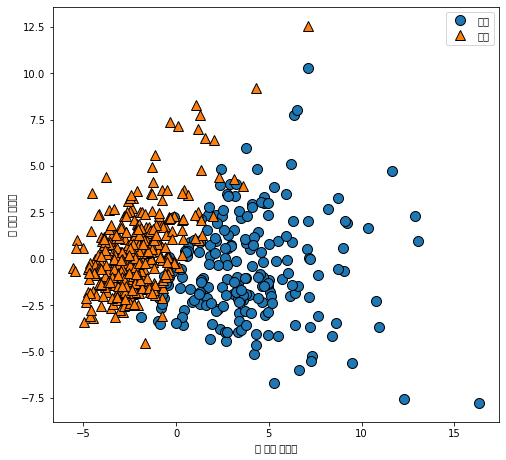

In [9]:
plt.figure(figsize = (8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(["악성","양성"], loc = "best")
plt.gca().set_aspect("equal")
plt.xlabel("첫 번째 주성분")
plt.ylabel("두 번째 주성분")

+ 비지도 학습 -> 데이터에 있는 상관관계만을 고려함 -> 그럼에도 불구하고 잘 구분 되어 있음
+ 악성 포인트가 양성 포인트보다 더 넓게 퍼져있는 것을 확인
단점은 두 축을 해석하기가 힘듬 : 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태임
> 즉, 특성 != 주성분 이기 때문에 어떤 특성을 이용했는지 알수 x



In [10]:
print("PCA 주성분 형태:", pca.components_.shape)  #(주성분,특성)

PCA 주성분 형태: (2, 30)


In [11]:
print("PCA 주성분:", pca.components_) 

PCA 주성분: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

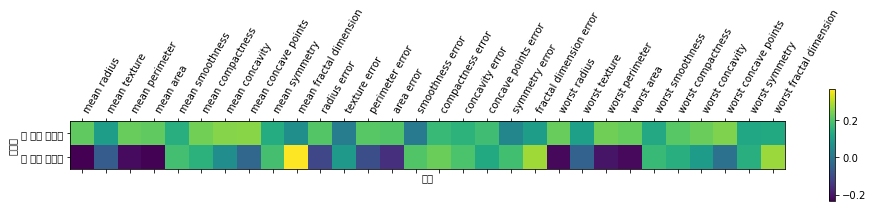

In [13]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ["첫 번째 주성분", "두 번째 주성분"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation = 60, ha='left')
plt.xlabel("특성")
plt.ylabel("주성분")

히트맵을 보면 주성분에 30개의 특성이 모두 관여되어 있고, 두번째 주성분을 보면 음수의 값도 있는 것으로 보아 분석하기 힘듬


### 고유얼굴 특성 추출 
+ eigenvertor 느낌,,?


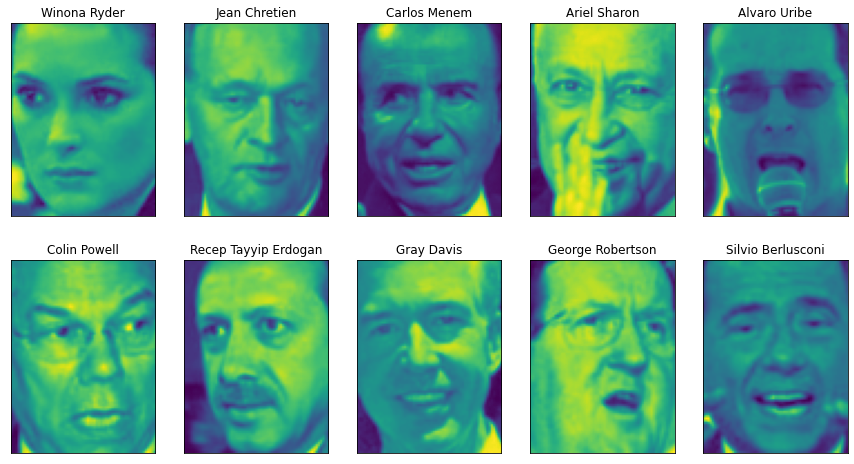

In [16]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person = 20, resize = 0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [17]:
print("people.image.shape:", people.images.shape) #(87*65)
print("클래스 개수:", len(people.target_names))

people.image.shape: (3023, 87, 65)
클래스 개수: 62


In [20]:
counts = np.bincount(people.target)

for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if(i +1)%3 == 0:
        print()
        
# 조지 부시와 콜린 파월의 이미지가 많은 것을 확인 -> 이 두사람들의 이미지에 치우친 특성이 추출 되므로 일정하게 50개의 이미지만 선택

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [21]:
mask = np.zeros(people.target.shape, dtype = np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask] #마스크가 1인 것만 담음

X_people = X_people/255 #흑백 처리 

분류하려는 얼굴과 가장 비슷한 얼굴 이미지를 찾는 1-최근접 이웃 분류기 사용 : KNeighborsClassifier


In [24]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify = y_people, random_state = 0)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print("1- 최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test, y_test)))

1- 최근접 이웃의 테스트 세트 점수 : 0.23


정확도가 좋지 않음 -> 원본 픽셀 공간에서 거리를 계산하는 것은 똑같은 이미지여도 방향이 치우쳐져 있으면 전혀 다른 데이터로 인식
> 즉, pca가 필요함
> pca의 화이트닝 옵션으로 주성분의 스케일이 같아지도록 조정함

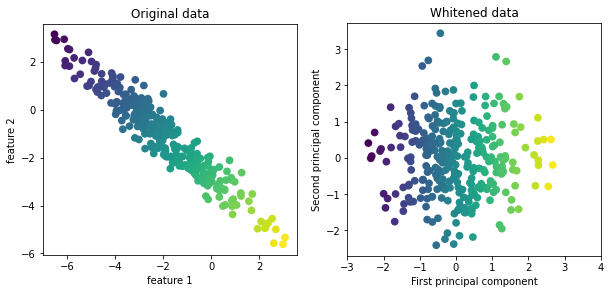

In [25]:
mglearn.plots.plot_pca_whitening()

In [26]:
# 주성분 100개 추출
pca = PCA(n_components = 100, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)



X_train_pca.shape: (1547, 100)


In [27]:

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("1- 최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test_pca, y_test)))

#모델의 정확도가 올라갔으므로, 주성분이 데이터를 잘 표현한다고 판단 할 수 있음

1- 최근접 이웃의 테스트 세트 점수 : 0.31


In [34]:
#p210을 참고하여 성분 다르게 적용 
pca = PCA(n_components = 200, whiten = True, random_state = 0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape:", X_train_pca.shape)


knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train_pca, y_train)
print("1- 최근접 이웃의 테스트 세트 점수 : {:.2f}".format(knn.score(X_test_pca, y_test)))

#100~130정도의 conponents가 정확도가 높아보임

X_train_pca.shape: (1547, 200)
1- 최근접 이웃의 테스트 세트 점수 : 0.26
